   year       value_1        value_2    total_value
0  2016   5972.198320    6026.031359   11998.229680
1  2017  12720.190715   12418.762966   25138.953681
2  2018  13947.393842   19306.252478   33253.646320
3  2019  27758.559937   27064.777754   54823.337691
4  2020  37967.023732   38212.893526   76179.917258
5  2021  46152.607627   42147.299155   88299.906783
6  2022  42575.197969   55110.256127   97685.454096
7  2023  52762.654580   64044.602827  116807.257407
8  2024  72590.372685   82496.110567  155086.483252
9  2025  82816.986269  107560.199392  190377.185661


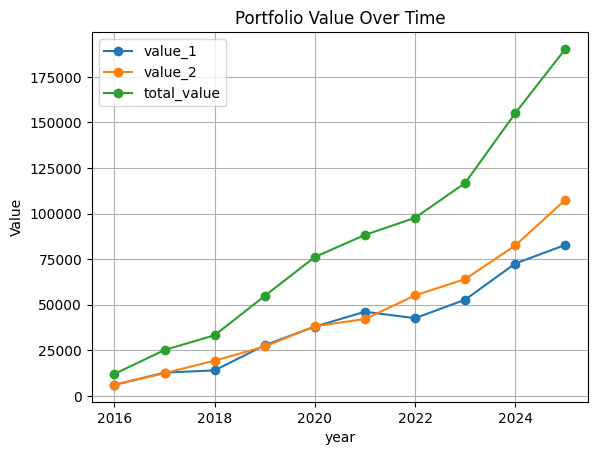

In [1]:
import pandas as pd

# Load data
asset1 = pd.read_csv("./data/sh000001.csv", parse_dates=['date'])
asset2 = pd.read_csv("./data/gold.csv", parse_dates=['date'])

# Ensure data is sorted
asset1.sort_values('date', inplace=True)
asset2.sort_values('date', inplace=True)

# Merge by date
df = pd.merge(asset1, asset2, on='date', suffixes=('_1', '_2'))
df['year'] = df['date'].dt.year

# Initialize tracking variables
invest_per_year = 6000
total_invested = 0

units_1 = 0
units_2 = 0

portfolio_history = []

# Simulate year by year
for year, group in df.groupby('year'):
    # Use first price of the year for buying
    price_1 = group.iloc[0]['close_1']
    price_2 = group.iloc[0]['close_2']

    # Invest in both
    units_1 += invest_per_year / price_1
    units_2 += invest_per_year / price_2
    total_invested += invest_per_year * 2

    # Use last price of the year for rebalancing
    end_price_1 = group.iloc[-1]['close_1']
    end_price_2 = group.iloc[-1]['close_2']

    value_1 = units_1 * end_price_1
    value_2 = units_2 * end_price_2
    total_value = value_1 + value_2

    # Rebalancing rule: if one asset > half of portfolio, rebalance
    if value_1 > total_value / 2:
        excess = value_1 - total_value / 2
        units_1 -= excess / end_price_1
        units_2 += excess / end_price_2
    elif value_2 > total_value / 2:
        excess = value_2 - total_value / 2
        units_2 -= excess / end_price_2
        units_1 += excess / end_price_1

    # Record the portfolio
    portfolio_history.append({
        'year': year,
        'value_1': value_1,
        'value_2': value_2,
        'total_value': value_1 + value_2
    })

# Display results
portfolio_df = pd.DataFrame(portfolio_history)
print(portfolio_df)

# Plotting (optional)
import matplotlib.pyplot as plt

portfolio_df.set_index('year')[['value_1', 'value_2', 'total_value']].plot(marker='o')
plt.title('Portfolio Value Over Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()
